# Preparación de los datos previo al entrenamiento

En este notebook se muestra un proceso EDA de manera sucinta para familiarizarnos con los datos que se usarán para el entrenamiento. Para dicho fin, iniciaremos con la lógica detrás de la elección del conjunto de datos en cuestión.

Elegimos el dataset de Kaggle: **"Credit Card Fraud Detection"**.
La razón detrás de esta decisión se basa principalmente en los siguientes puntos:

1. El enfoque principal de la prueba debe estar basado en la parte de explicabilidad del modelo, por lo cual tomamos un dataset que es ya todo un estándard para modelos de clasificación binaria, el cual además ya está tratado y listo para ser usado. 

2. También podemos mencionar que el dataset está basado en datos reales, y aunque es una dataset público y prácticamente tiene sus variables anónimas, su fuente original se basa en datos transaccionales reales, lo que es dificl de simular de otro modo. 

3. Por la razón antes mencionada, el desbalanceo de clases es una característica intrínseca del mismo sin duda alguna. Además, se usa justamente para modelar la detección de fraude crediticio, como se especifica en la prueba.

Para más información, se puede consultar la siguiente liga: [ Kaggle: Credit Card Fraud Detection](https://www.google.com/url?sa=E&q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fmlg-ulb%2Fcreditcardfraud)

In [1]:
# ====================================================================
# LIBRERÍAS
# ====================================================================
# Se importan las librerías necesarias para el análisis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para una mejor visualización.
sns.set_style('whitegrid')
%matplotlib inline

## Carga de datos y análsis exploratorio rápido.

Procedemos a cargar el conjunto de datos, para enseguida realizar un análisis exploratorio para entender sus características principales y prepararlo para la etapa de modelado.

In [4]:
# ====================================================================
# CARGA DE DATOS
# ====================================================================
# Se carga el dataset desde la ruta especificada.
DATA_PATH = "../Source/Dataset/archive.zip"

# Cargamos el dataset en un DataFrame de pandas.
df = pd.read_csv(DATA_PATH, compression='zip')

print("Datos cargados exitosamente.")

# ====================================================================
# ANÁLISIS EXPLORATORIO INICIAL (EDA)
# ====================================================================
# Se realiza una primera inspección para entender la estructura y calidad de los datos.

# 1. Dimensiones del DataFrame
print("1. Dimensiones del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("-" * 50)

# 2. Información general y tipos de datos
print("2. Información general y tipos de datos:")
df.info()
print("-" * 50)

# 3. Verificación de valores nulos
print("3. Verificación de valores nulos:")
nulos = df.isnull().sum().any()

print(f"El dataset contiene {nulos} valores nulos.")
print()
print("-" * 50)

# 4. Primeras 5 filas del dataset
print("4. Muestra de los datos:")
display(df.head())
print("-" * 50)

# 5. Estadísticas descriptivas
print("5. Estadísticas descriptivas del conjunto de datos:")
display(df.describe().T)

Datos cargados exitosamente.
1. Dimensiones del dataset:
Número de filas: 284807
Número de columnas: 31
--------------------------------------------------
2. Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


--------------------------------------------------
5. Estadísticas descriptivas del conjunto de datos:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Análisis de la Variable Objetivo: Class
Echemos un vistazo a la variable que queremos predecir. Sabemos de ante mano que las clases están desbalanceadas, dado que la tabla se basa en datos reales es de esperarse que haya una cantidad pequeña de registros catalogados como fraudulentos.

Distribución de la variable 'Class':
Class
0    284315
1       492
Name: count, dtype: int64

Proporción de cada clase (en porcentaje):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
--------------------------------------------------


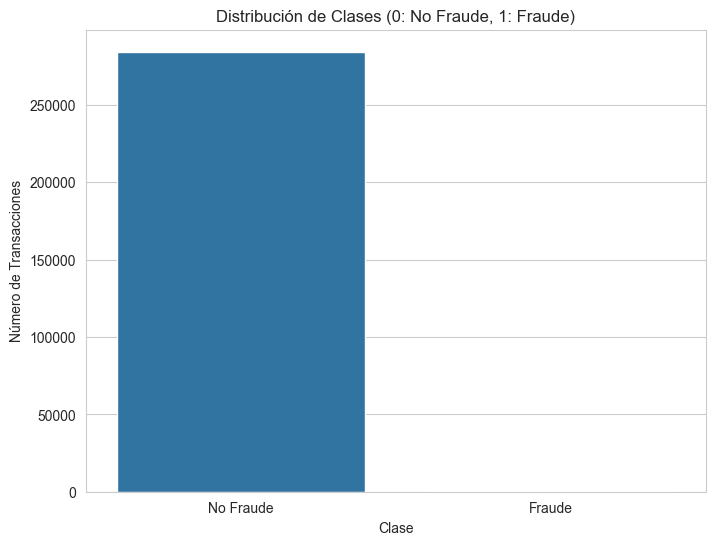

In [11]:
# ====================================================================
# ANÁLISIS DEL DESBALANCE DE CLASES
# ====================================================================
# Se analiza la distribución de la variable objetivo 'Class' para confirmar el desbalance.
# 0: Transacción No Fraudulenta
# 1: Transacción Fraudulenta

# Conteo y proporción de cada clase.
class_counts = df['Class'].value_counts()
class_proportions = df['Class'].value_counts(normalize=True)

print("Distribución de la variable 'Class':")
print(class_counts)
print("\nProporción de cada clase (en porcentaje):")
print(class_proportions*100)
print("-" * 50)

# Visualización del desbalance.
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribución de Clases (0: No Fraude, 1: Fraude)')
plt.ylabel('Número de Transacciones')
plt.xlabel('Clase')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Como podemos constatar, el dataset es altamente desbalanceado entre ambas clases a predecir.

Poco podemos decir del resto de variables al no conocer sus nombres, excepto por las variables que aún lo conservan. Revisemos un poco de ellas:


Análisis de las variables 'Amount' (Monto) y 'Time' (Tiempo):


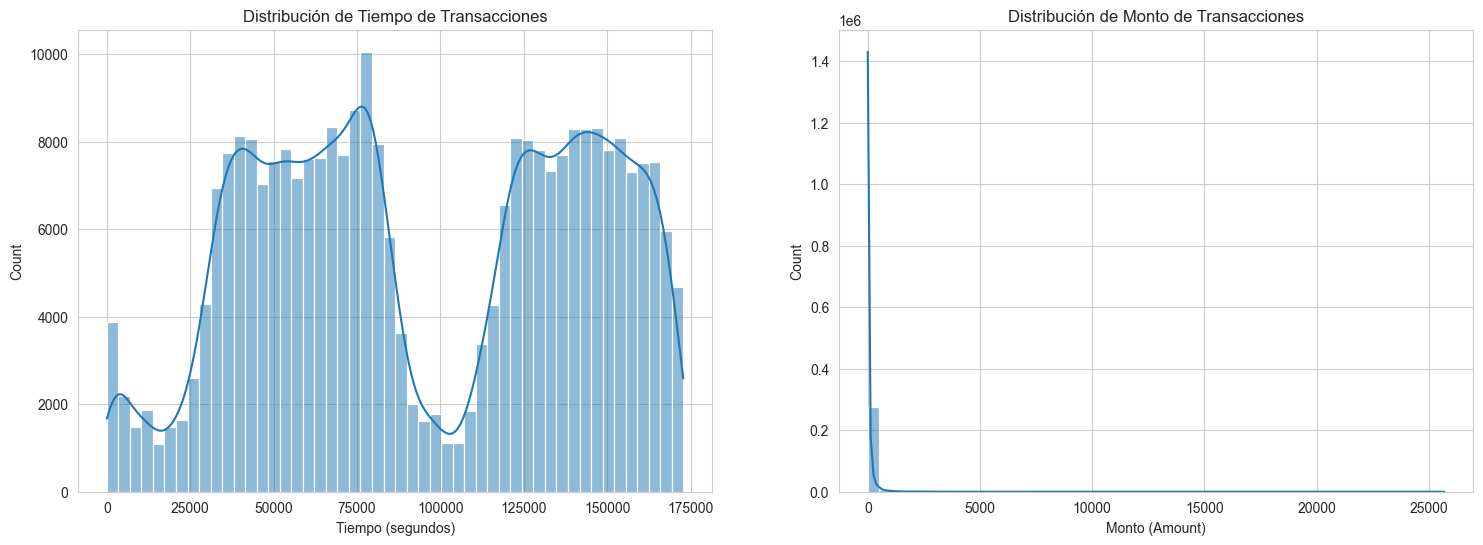


Descriptive statistics for 'Amount':
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [13]:
# --- Análisis de distribución de las variables 'Amount' y 'Time' ---
print("\nAnálisis de las variables 'Amount' (Monto) y 'Time' (Tiempo):")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de 'Time'
sns.histplot(df['Time'], bins=50, ax=ax1, kde=True)
ax1.set_title('Distribución de Tiempo de Transacciones')
ax1.set_xlabel('Tiempo (segundos)')

# Gráfico de 'Amount'
sns.histplot(df['Amount'], bins=50, ax=ax2, kde=True)
ax2.set_title('Distribución de Monto de Transacciones')
ax2.set_xlabel('Monto (Amount)')

plt.show()

print("\nDescriptive statistics for 'Amount':")
print(df['Amount'].describe())

"Monto" presenta una cola muy larga y está principalmente concentrada en cantidades pequeñas, es decir, que la mayoría de las transacciones de este conjunto de datos son pequeñas.

Para la variable de tiempo observamos una distribución bimodal, por lo que podríamos inferir dos tipos de transacciones diferentes entre sí, que no necesarimente corresponden a las clases de la variable objetivo dada la baja frecuencia de las trasacciones fraudulentas.

## División de Datos (Train/Test Split)
Procedamos ahora a dividir los datos en conjuntos de entrenamiento y prueba para la fase de entrenamiento. Hagamos énfasis en el hecho de que es necesario usar la estratificación para asegurar que la proporción de clases se mantenga en ambos conjuntos.

In [18]:
# ====================================================================
# DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA
# ====================================================================
# Se importan las librerías necesarias para la división de datos.
from sklearn.model_selection import train_test_split

# 1. Se definen las características (X) y la variable objetivo (y).
#    Se excluye 'Time' ya que su valor es secuencial y podría no ser un buen predictor
#    en un contexto de train/test split sin un tratamiento más avanzado (ej. time series).
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# 2. Se realiza la división estratificada.
#    - test_size=0.2: 20% de los datos para prueba.
#    - stratify=y: Asegura que la proporción de fraude/no-fraude sea la misma en train y test.
#    - random_state=42: Para reproducibilidad.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 3. Se verifican las dimensiones y proporciones de los nuevos datasets.
print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print("-" * 50)

print("Conteo y proporción de fraude en el conjunto de entrenamiento:")
print(y_train.value_counts() )
print(y_train.value_counts(normalize=True))
print("\nConteo y Proporción de fraude en el conjunto de prueba:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Dimensiones de los conjuntos de datos:
X_train: (227845, 29)
X_test: (56962, 29)
y_train: (227845,)
y_test: (56962,)
--------------------------------------------------
Conteo y proporción de fraude en el conjunto de entrenamiento:
Class
0    227451
1       394
Name: count, dtype: int64
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Conteo y Proporción de fraude en el conjunto de prueba:
Class
0    56864
1       98
Name: count, dtype: int64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [22]:
# ====================================================================
# GUARDADO DE LOS CONJUNTOS DE DATOS
# ====================================================================
# Se guardan los DataFrames en diccionario con formato pickle para ser utilizados en los siguientes notebooks.

processed_data = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

# Crear un directorio para los datos procesados si no existe.
import os, pickle
os.makedirs('../Source/processed_data', exist_ok=True)
SAVE_PATH = "../Source/processed_data/split_data.pkl"

with open(SAVE_PATH, 'wb') as file:
    pickle.dump(processed_data, file)

print(f"Los conjuntos de datos de entrenamiento y prueba han sido guardados exitosamente en: {SAVE_PATH}")

Los conjuntos de datos de entrenamiento y prueba han sido guardados exitosamente en: ../Source/processed_data/split_data.pkl
